Hier möchte einen Solver schreiben, der einen Verformungsfall einer  ebenen Platte betrachtet. 
Hierbei orientiere ich mich an dem folgenden Tutorial:
https://www.youtube.com/watch?v=1j_HdsVkglk&list=PLDatYNwS3wZ_b9xVZOb2K9zUTDOp0gY0T

In [96]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
import numpy as np
import math
import sympy as smp
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [98]:
'''
def shape(xi): # xi = (xi, eta) # Die Funktion wird nie verwendet. 
    """
    Berechnet die Formfunktionen für ein quadratisches Element an den gegebenen natürlichen Koordinaten.

    Args:
        xi (tuple): Ein Tupel der natürlichen Koordinaten (xi, eta).

    Returns:
        numpy.ndarray: Ein Array der Formfunktionen an den gegebenen natürlichen Koordinaten.
    """
    x,y = tuple(xi)
    print(tuple(xi))
    N = [
        (1.0-x)*(1.0-y),
        (1.0+x)*(1.0-y), 
        (1.0+x)*(1.0+y), 
        (1.0-x)*(1.0+y)
        ]
    return 0.25*np.array(N)'''

'\ndef shape(xi): # xi = (xi, eta) # Die Funktion wird nie verwendet. \n    """\n    Berechnet die Formfunktionen für ein quadratisches Element an den gegebenen natürlichen Koordinaten.\n\n    Args:\n        xi (tuple): Ein Tupel der natürlichen Koordinaten (xi, eta).\n\n    Returns:\n        numpy.ndarray: Ein Array der Formfunktionen an den gegebenen natürlichen Koordinaten.\n    """\n    x,y = tuple(xi)\n    print(tuple(xi))\n    N = [\n        (1.0-x)*(1.0-y),\n        (1.0+x)*(1.0-y), \n        (1.0+x)*(1.0+y), \n        (1.0-x)*(1.0+y)\n        ]\n    return 0.25*np.array(N)'

In [144]:
def gradshape(xi_tuple):
    """
    Computes the gradient of the shape functions for a quadrilateral element.

    Parameters:
    xi (tuple): A tuple containing the local coordinates (xi, eta) where xi and eta are 
                the local coordinates in the reference element.

    Returns:
    numpy.ndarray: A 2x4 array containing the gradients of the shape functions with respect 
                   to the local coordinates (xi, eta). The first row contains the derivatives 
                   with respect to xi, and the second row contains the derivatives with respect 
                   to eta.

    The shape functions are defined as follows:
    N1 = 0.25 * (1 - xi) * (1 - eta)
    N2 = 0.25 * (1 + xi) * (1 - eta)
    N3 = 0.25 * (1 + xi) * (1 + eta)
    N4 = 0.25 * (1 - xi) * (1 + eta)

    The gradients of the shape functions are computed as:
    dN/dxi  = [ -(1 - eta), (1 - eta),  (1 + eta), -(1 + eta)]
    dN/deta = [ -(1 - xi), -(1 + xi),  (1 + xi),  (1 - xi)]
    """
    xi, eta = smp.symbols('xi eta')
    N1 = 0.25 * (1 - xi) * (1 - eta)
    N2 = 0.25 * (1 + xi) * (1 - eta)
    N3 = 0.25 * (1 + xi) * (1 + eta)
    N4 = 0.25 * (1 - xi) * (1 + eta)
    N = [N1, N2, N3, N4]
    dN_dxi = [smp.diff(Ni, xi) for Ni in N]
    dN_deta = [smp.diff(Ni, eta) for Ni in N]
    dN = smp.Matrix([dN_dxi, dN_deta])

    n1, n2, n3, n4 = smp.symbols('N_1 N_2 N_3 N_4')
    n_n = [n1, n2, n3, n4]

    print("Formfunktionen:")
    for i, Ni in enumerate(N, start=1):
        equation = smp.Eq(n_n[i-1], Ni)
        smp.pprint(equation)
        # smp.pprint(Ni)
        # print(f"N{i} =", Ni)

    print("\nGradienten der Formfunktionen:")
    print("dN/dxi:")
    #x = smp.symbols('x')
    #N = smp.symbols('N', cls=smp.Function)
    #dNdxi = smp.diff(N,x)
    #smp.pprint(dNdxi)
    #eq = smp.Eq(dNdxi, dN_dxi)
    smp.pprint(dN_dxi)
    print("dN/deta:")
    smp.pprint(dN_deta)

    print("\nGradienten-Matrix:")
    smp.pprint(dN)

    print("Mit den natürlichen Koordinaten:", xi_tuple, "folgt:")
    dN = dN.subs({xi: xi_tuple[0], eta: xi_tuple[1]})
    # Numerische Evaluierung der SymPy-Matrix
    dN = dN.evalf()
    #np_matrix = np.array(numeric_matrix.tolist(), dtype=np.float64
    dN = dN.tolist()
    smp.pprint(dN)
    #x,y = tuple(xi_tuple)
    #dN = [
    #    [ -(1.0-y), (1.0-y),  (1.0+y), -(1.0+y)],
    #    [ -(1.0-x),-(1.0+x),  (1.0+x),  (1.0-x)]
    #]
    return np.array(dN, dtype=np.float64)

In [145]:
gradshape((4,10))

Formfunktionen:
N₁ = (0.25 - 0.25⋅ξ)⋅(1 - η)
N₂ = (1 - η)⋅(0.25⋅ξ + 0.25)
N₃ = (η + 1)⋅(0.25⋅ξ + 0.25)
N₄ = (0.25 - 0.25⋅ξ)⋅(η + 1)

Gradienten der Formfunktionen:
dN/dxi:
[0.25⋅η - 0.25, 0.25 - 0.25⋅η, 0.25⋅η + 0.25, -0.25⋅η - 0.25]
dN/deta:
[0.25⋅ξ - 0.25, -0.25⋅ξ - 0.25, 0.25⋅ξ + 0.25, 0.25 - 0.25⋅ξ]

Gradienten-Matrix:
⎡0.25⋅η - 0.25  0.25 - 0.25⋅η   0.25⋅η + 0.25  -0.25⋅η - 0.25⎤
⎢                                                            ⎥
⎣0.25⋅ξ - 0.25  -0.25⋅ξ - 0.25  0.25⋅ξ + 0.25  0.25 - 0.25⋅ξ ⎦
Mit den natürlichen Koordinaten: (4, 10) folgt:
[[2.25, -2.25, 2.75, -2.75], [0.75, -1.25, 1.25, -0.75]]


array([[ 2.25, -2.25,  2.75, -2.75],
       [ 0.75, -1.25,  1.25, -0.75]])

In [107]:
mesh_ex = 9  # Number of elements in x-direction
mesh_ey = 49  # Number of elements in y-direction
mesh_lx = 10.0  # Length of the domain in x-direction (Width of the plate)
mesh_ly = 50.0  # Length of the domain in y-direction (Length of the plate)

In [121]:
mesh_nx = mesh_ex + 1               # Number of nodes in x-direction
mesh_ny = mesh_ey + 1               # Number of nodes in y-direction 
num_nodes = mesh_nx * mesh_ny       # Total number of nodes
num_elements = mesh_ex * mesh_ey    # Total number of elements
mesh_hx = mesh_lx / mesh_ex         # Element size in x-direction
mesh_hy = mesh_ly / mesh_ey         # Element size in y-direction

# Ausgabe der Berechnungen
print("Anzahl der Knoten und Elemente: \n")
print("Anzahl der Knoten in x-Richtung:")
latex_code = r"$mesh_{ex} = " + f"{mesh_ex}$"
display(Math(latex_code))

print("Anzahl der Knoten in y-Richtung:")
latex_code = r"$mesh_{ey} = " + f"{mesh_ey}$"
display(Math(latex_code))

print("Gesamtanzahl der Knoten:")
latex_code = r"$num_{nodes} = " + f"{num_nodes}$"
display(Math(latex_code))

print("Gesamtanzahl der Elemente:")
latex_code = r"$num_{elements} = " + f"{num_elements}$"
display(Math(latex_code))

nodes = []                          # List to store the nodal coordinates
for y in np.linspace(0, mesh_ly, mesh_ny):      # Generate the nodal coordinates along y
    for x in np.linspace(0, mesh_lx, mesh_nx):  # Generate the nodal coordinates along x
        nodes.append([x, y])                    # Append the nodal coordinates to the list
nodes = np.array(nodes)                         # Convert the list to a numpy array

display(nodes)

conn = [] # List to store the element connectivity
for j in range(mesh_ey): # Loop over the elements in y-direction
    for i in range(mesh_ex): # Loop over the elements in x-direction
        n0 = i + j*mesh_nx # Node number at the bottom-left corner of the element
        conn.append([
            n0,             # Node number at the bottom-left corner
            n0+1,           # Node number at the bottom-right corner
            n0+1+mesh_nx,   # Node number at the top-right corner
            n0+mesh_nx      # Node number at the top-left corner
        ]) # Append the element connectivity to the list

display(conn)

Anzahl der Knoten und Elemente: 

Anzahl der Knoten in x-Richtung:


<IPython.core.display.Math object>

Anzahl der Knoten in y-Richtung:


<IPython.core.display.Math object>

Gesamtanzahl der Knoten:


<IPython.core.display.Math object>

Gesamtanzahl der Elemente:


<IPython.core.display.Math object>

array([[ 0.        ,  0.        ],
       [ 1.11111111,  0.        ],
       [ 2.22222222,  0.        ],
       [ 3.33333333,  0.        ],
       [ 4.44444444,  0.        ],
       [ 5.55555556,  0.        ],
       [ 6.66666667,  0.        ],
       [ 7.77777778,  0.        ],
       [ 8.88888889,  0.        ],
       [10.        ,  0.        ],
       [ 0.        ,  1.02040816],
       [ 1.11111111,  1.02040816],
       [ 2.22222222,  1.02040816],
       [ 3.33333333,  1.02040816],
       [ 4.44444444,  1.02040816],
       [ 5.55555556,  1.02040816],
       [ 6.66666667,  1.02040816],
       [ 7.77777778,  1.02040816],
       [ 8.88888889,  1.02040816],
       [10.        ,  1.02040816],
       [ 0.        ,  2.04081633],
       [ 1.11111111,  2.04081633],
       [ 2.22222222,  2.04081633],
       [ 3.33333333,  2.04081633],
       [ 4.44444444,  2.04081633],
       [ 5.55555556,  2.04081633],
       [ 6.66666667,  2.04081633],
       [ 7.77777778,  2.04081633],
       [ 8.88888889,

[[0, 1, 11, 10],
 [1, 2, 12, 11],
 [2, 3, 13, 12],
 [3, 4, 14, 13],
 [4, 5, 15, 14],
 [5, 6, 16, 15],
 [6, 7, 17, 16],
 [7, 8, 18, 17],
 [8, 9, 19, 18],
 [10, 11, 21, 20],
 [11, 12, 22, 21],
 [12, 13, 23, 22],
 [13, 14, 24, 23],
 [14, 15, 25, 24],
 [15, 16, 26, 25],
 [16, 17, 27, 26],
 [17, 18, 28, 27],
 [18, 19, 29, 28],
 [20, 21, 31, 30],
 [21, 22, 32, 31],
 [22, 23, 33, 32],
 [23, 24, 34, 33],
 [24, 25, 35, 34],
 [25, 26, 36, 35],
 [26, 27, 37, 36],
 [27, 28, 38, 37],
 [28, 29, 39, 38],
 [30, 31, 41, 40],
 [31, 32, 42, 41],
 [32, 33, 43, 42],
 [33, 34, 44, 43],
 [34, 35, 45, 44],
 [35, 36, 46, 45],
 [36, 37, 47, 46],
 [37, 38, 48, 47],
 [38, 39, 49, 48],
 [40, 41, 51, 50],
 [41, 42, 52, 51],
 [42, 43, 53, 52],
 [43, 44, 54, 53],
 [44, 45, 55, 54],
 [45, 46, 56, 55],
 [46, 47, 57, 56],
 [47, 48, 58, 57],
 [48, 49, 59, 58],
 [50, 51, 61, 60],
 [51, 52, 62, 61],
 [52, 53, 63, 62],
 [53, 54, 64, 63],
 [54, 55, 65, 64],
 [55, 56, 66, 65],
 [56, 57, 67, 66],
 [57, 58, 68, 67],
 [58, 59, 6

In [149]:
print("Dies ist die Materialsteifigkeitsmatrix: \n")
Es, vs = smp.symbols('E nu') # Define the symbols for Young's modulus and Poisson's ratio
C = Es/(1+vs)/(1-2*vs)*smp.Matrix([ # Plane stress constitutive matrix
    [   1-vs ,  vs    ,      0],
    [   vs   ,  1-vs  ,      0],
    [   0   ,  0    , 0.5-vs ]])

smp.pprint(C)   # Pretty-print the constitutive matrix

E = 100.0 # Young's modulus
print("mit einem Elastizitätsmodul von:")
latex_code = r"$E = " + f"{E} GPa$"
display(Math(latex_code))
v = 0.48   # Poisson's ratio
print("und einer Poissonzahl von:")
latex_code = r"$\nu =" + f"{v}$"
display(Math(latex_code))


C = C.subs({Es: E, vs: v}) # Substitute the values of Young's modulus and Poisson's ratio
smp.pprint(C) # Pretty-print the constitutive matrix with the values of Young's modulus and Poisson
C = C.evalf() # Evaluate the matrix numerically
C = C.tolist() # Convert the matrix to a list
C = np.array(C, dtype=np.float64) # Convert the list to a numpy array

Dies ist die Materialsteifigkeitsmatrix: 

⎡    E⋅(1 - ν)             E⋅ν                          ⎤
⎢─────────────────  ─────────────────          0        ⎥
⎢(1 - 2⋅ν)⋅(ν + 1)  (1 - 2⋅ν)⋅(ν + 1)                   ⎥
⎢                                                       ⎥
⎢       E⋅ν             E⋅(1 - ν)                       ⎥
⎢─────────────────  ─────────────────          0        ⎥
⎢(1 - 2⋅ν)⋅(ν + 1)  (1 - 2⋅ν)⋅(ν + 1)                   ⎥
⎢                                                       ⎥
⎢                                         E⋅(0.5 - ν)   ⎥
⎢        0                  0          ─────────────────⎥
⎣                                      (1 - 2⋅ν)⋅(ν + 1)⎦
mit einem Elastizitätsmodul von:


<IPython.core.display.Math object>

und einer Poissonzahl von:


<IPython.core.display.Math object>

⎡878.378378378378  810.81081081081          0        ⎤
⎢                                                    ⎥
⎢810.81081081081   878.378378378378         0        ⎥
⎢                                                    ⎥
⎣       0                 0          33.7837837837838⎦


In [150]:
K = np.zeros((2*num_nodes, 2*num_nodes)) # Global stiffness matrix
q4 = [[x/math.sqrt(3), y/math.sqrt(3)] for y in [-1, 1] for x in [-1, 1]] # Quadrature points
print("Die Quadraturpunkte sind:")
for q in q4:
    smp.pprint(q)
print("\n")
print("Die Quadraturpunkte werden für die approximierte Integration über das Element verwendet mittels der numerischen 2x2 Gauß-Quadratur. \n")
B = np.zeros((3, 2*4)) # Strain-displacement matrix
for c in conn:
    xIe = nodes[c, :] # x-coordinates of the nodes of the element
    Ke = np.zeros((8, 8)) # Element stiffness matrix
    for q in q4:
        dN = gradshape(q) # Compute the gradient of the shape functions
        J = np.dot(dN, xIe).T # Compute the Jacobian matrix
        dN = np.dot(np.linalg.inv(J), dN)
        B[0, 0::2] = dN[0, :]
        B[1, 1::2] = dN[1, :]
        B[2, 0::2] = dN[1, :]
        B[2, 1::2] = dN[0, :]
        Ke += np.dot(np.dot(B.T, C), B) * np.linalg.det(J)
    
    for i, I in enumerate(c):
        for j, J in enumerate(c):
            K[2*I       , 2*J]          += Ke[2*i       , 2*j]
            K[2*I + 1   , 2*J]          += Ke[2*i + 1   , 2*j]
            K[2*I + 1   , 2*J + 1]      += Ke[2*i + 1   , 2*j + 1]
            K[2*I       , 2*J + 1]      += Ke[2*i       , 2*j + 1]

[-0.5773502691896258, -0.5773502691896258]
[0.5773502691896258, -0.5773502691896258]
[-0.5773502691896258, 0.5773502691896258]
[0.5773502691896258, 0.5773502691896258]
Formfunktionen:
N₁ = (0.25 - 0.25⋅ξ)⋅(1 - η)
N₂ = (1 - η)⋅(0.25⋅ξ + 0.25)
N₃ = (η + 1)⋅(0.25⋅ξ + 0.25)
N₄ = (0.25 - 0.25⋅ξ)⋅(η + 1)

Gradienten der Formfunktionen:
dN/dxi:
[0.25⋅η - 0.25, 0.25 - 0.25⋅η, 0.25⋅η + 0.25, -0.25⋅η - 0.25]
dN/deta:
[0.25⋅ξ - 0.25, -0.25⋅ξ - 0.25, 0.25⋅ξ + 0.25, 0.25 - 0.25⋅ξ]

Gradienten-Matrix:
⎡0.25⋅η - 0.25  0.25 - 0.25⋅η   0.25⋅η + 0.25  -0.25⋅η - 0.25⎤
⎢                                                            ⎥
⎣0.25⋅ξ - 0.25  -0.25⋅ξ - 0.25  0.25⋅ξ + 0.25  0.25 - 0.25⋅ξ ⎦
Mit den natürlichen Koordinaten: [-0.5773502691896258, -0.5773502691896258] folgt:
[[-0.394337567297406, 0.394337567297406, 0.105662432702594, -0.105662432702594 ↪

↪ ], [-0.394337567297406, -0.105662432702594, 0.105662432702594, 0.39433756729 ↪

↪ 7406]]
Formfunktionen:
N₁ = (0.25 - 0.25⋅ξ)⋅(1 - η)
N₂ = (1 - η)⋅(0.2

: 

In [80]:
f = np.zeros(2*num_nodes) # Global force vector
for i in range(num_nodes):
    if nodes[i, 1] == 0.0:
        K[2*i, :] = 0.0
        K[2*i+1, :] = 0.0
        K[2*i, 2*i] = 1.0
        K[2*i+1, 2*i+1] = 1.0
    if nodes[i, 1] == mesh_ly:
        x = nodes[i, 0]
        f[2*i+1] = 20.0
        if x == 0.0 or x == mesh_lx:
            f[2*i+1] *= 0.5

In [81]:
u = np.linalg.solve(K, f) # Solve the system of equations

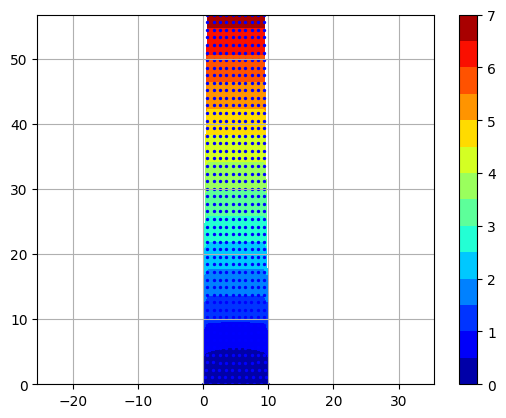

In [87]:
ux = np.reshape(u[0::2], (mesh_ny, mesh_nx)) # Displacement in x-direction
uy = np.reshape(u[1::2], (mesh_ny, mesh_nx)) # Displacement in y-direction
xvec = []
yvec = []
res = []
for i in range(mesh_nx):
    for j in range(mesh_ny):
        xvec.append(i*mesh_hx + ux[j, i])
        yvec.append(j*mesh_hy + uy[j, i])
        res.append(uy[j, i])

t = plt.tricontourf(xvec, yvec, res, levels=14,  cmap=plt.cm.jet)
plt.scatter(xvec, yvec, marker="o", c="b", s=2)
plt.grid()
plt.colorbar(t)
plt.axis("equal")
plt.show()